In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#pd.options.display.max_columns = None
pd.options.display.max_rows = None
 
#to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

#import train-test split 
from sklearn.model_selection import train_test_split

#import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

#import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

#functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

#functions for linear regression
from sklearn.linear_model import LinearRegression

#functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
def histograms(data):
    print('Histograms')
    data.hist()
    plt.tight_layout()
    plt.show()

Histograms


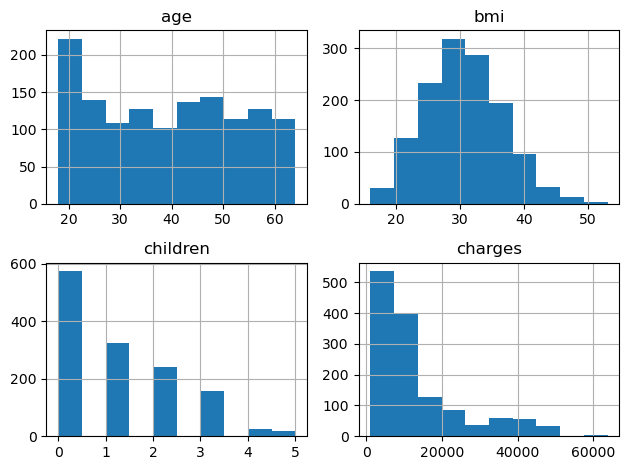

In [19]:
histograms(df)

<AxesSubplot:xlabel='sex', ylabel='count'>

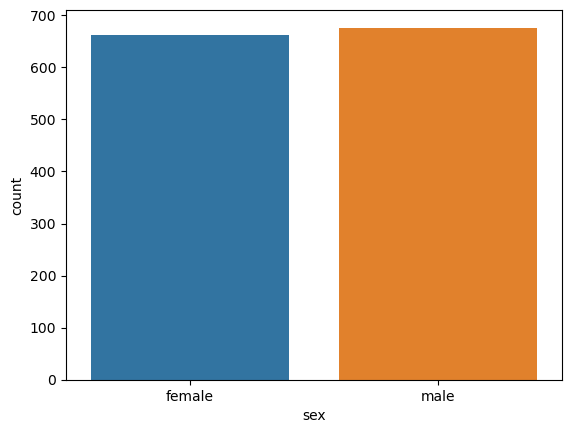

In [28]:
#plt.figure(figsize=(15,8))
sns.countplot(df['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

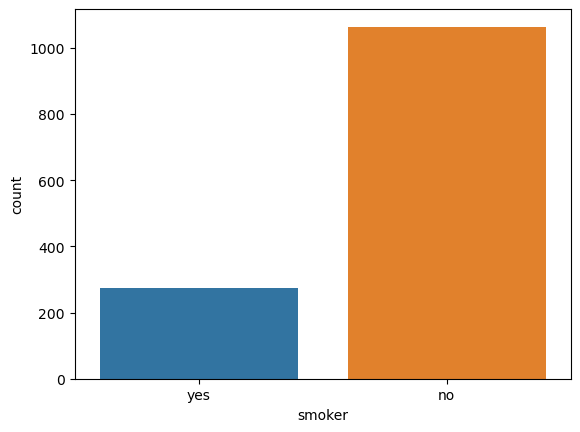

In [26]:
#plt.figure(figsize=(15,8))
sns.countplot(df['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

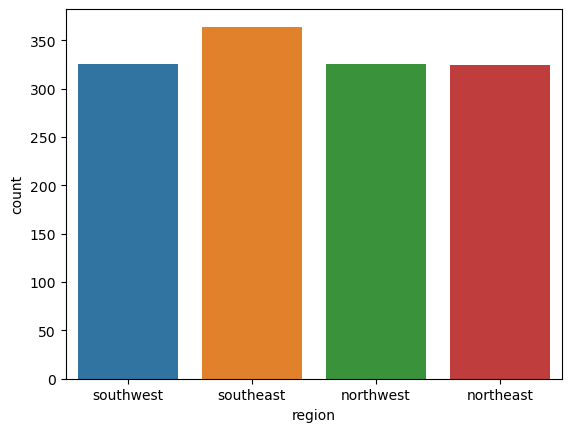

In [29]:
#plt.figure(figsize=(15,8))
sns.countplot(df['region'])

<AxesSubplot:>

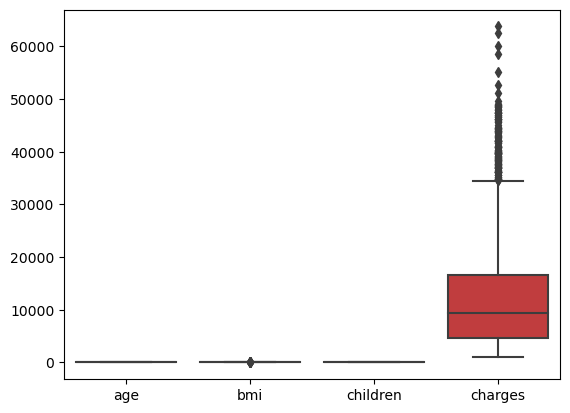

In [25]:
sns.boxplot(data= df)

In [44]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_trim=df[~((df<ll)|(df>ul)).any(axis=1)]
print(ll)
print(ul)

age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64
age           87.000000
bmi           47.290000
children       5.000000
charges    34489.350562
dtype: float64


<AxesSubplot:>

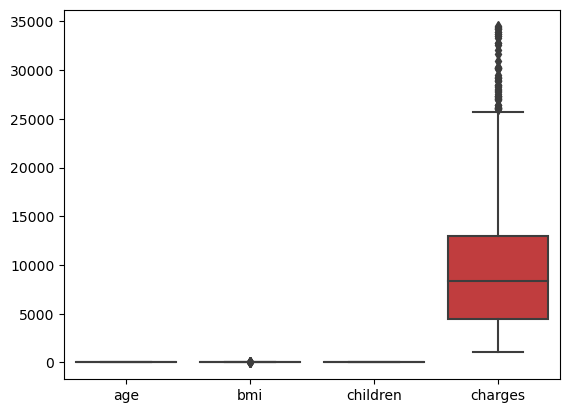

In [45]:
sns.boxplot(data= df_trim)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200
5,31,female,25.740000,0,no,southeast,3756.621600
6,46,female,33.440000,1,no,southeast,8240.589600
7,37,female,27.740000,3,no,northwest,7281.505600
8,37,male,29.830000,2,no,northeast,6406.410700
9,60,female,25.840000,0,no,northwest,28923.136920


In [56]:
dummy_frame=pd.get_dummies(df['sex'],drop_first=True)
df=pd.concat([df,dummy_frame],axis=1)

In [67]:
dummy_frame=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,dummy_frame],axis=1)

In [68]:
df

,yes,male,age,sex,bmi,children,smoker,region,charges,male,yes,yes
0,1,0,19,female,27.900000,0,yes,southwest,16884.924000,0,1,1
1,0,1,18,male,33.770000,1,no,southeast,1725.552300,1,0,0
2,0,1,28,male,33.000000,3,no,southeast,4449.462000,1,0,0
3,0,1,33,male,22.705000,0,no,northwest,21984.470610,1,0,0
4,0,1,32,male,28.880000,0,no,northwest,3866.855200,1,0,0
5,0,0,31,female,25.740000,0,no,southeast,3756.621600,0,0,0
6,0,0,46,female,33.440000,1,no,southeast,8240.589600,0,0,0
7,0,0,37,female,27.740000,3,no,northwest,7281.505600,0,0,0
8,0,1,37,male,29.830000,2,no,northeast,6406.410700,1,0,0
9,0,0,60,female,25.840000,0,no,northwest,28923.136920,0,0,0


In [69]:
df.skew()

yes         1.464766
male       -0.020951
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
male       -0.020951
yes         1.464766
yes         1.464766
dtype: float64

In [70]:
df.select_dtypes(exclude=['uint8','object']).dtypes

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [71]:
df.select_dtypes(exclude=['uint8','object']).skew()

age        0.055673
bmi        0.284047
children   0.938380
charges    1.515880
dtype: float64

In [74]:
df=np.log(df['bmi'])